In [3]:
#GET BASE KNOWLEDGE 

import pandas as pd
# import pandas to load and process spreadsheet-type data

medical_dataset=pd.read_csv('medical_data.csv') 

# load a medical dataset.

medical_dataset

,fever,cough,tiredness,headache,stuffy nose,runny nose,sneezing,sore throat,diagnosis
0,1,1,1,0,0,0,0,0,covid19
1,0,1,1,1,0,0,0,0,covid19
2,1,1,1,0,0,0,0,0,covid19
3,1,1,1,0,0,0,0,0,covid19
4,1,1,1,0,0,0,0,0,covid19
...,...,...,...,...,...,...,...,...,...
1995,0,1,0,0,1,0,1,1,common cold
1996,0,0,0,1,1,1,1,0,common cold
1997,0,0,1,0,1,0,0,1,common cold
1998,0,0,0,0,1,0,0,1,common cold


In [4]:
set(medical_dataset['diagnosis'])

{'allergies', 'common cold', 'covid19', 'flu'}

In [6]:

#CREATE MODEL


from sklearn.tree import DecisionTreeClassifier

def diagnose_v4(train_dataset:pd.DataFrame):
    
    # create a Decision Tree Classifier
    model=DecisionTreeClassifier(random_state=1)

    # drop the diagnosis column to get only the symptoms
    train_patient_symptoms=train_dataset.drop(columns=['diagnosis'])

    # get the diagnosis column, to be used as the classification target
    train_diagnoses=train_data['diagnosis']

    # build a decision tree
    model.fit(train_patient_symptoms, train_diagnoses)

    # return the trained model
    return model

In [7]:
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(medical_dataset, test_size=0.3, 
random_state=1)
print(train_data.shape)
print(test_data.shape)


(1400, 9)
(600, 9)


['allergies' 'common cold' 'covid19' 'flu']


[Text(334.8, 285.39000000000004, 'fever <= 0.5\ngini = 0.75\nsamples = 1400\nvalue = [354, 345, 358, 343]'),
 Text(167.4, 203.85000000000002, 'sore throat <= 0.5\ngini = 0.606\nsamples = 791\nvalue = [354, 340, 71, 26]'),
 Text(83.7, 122.31, 'runny nose <= 0.5\ngini = 0.497\nsamples = 526\nvalue = [354, 101, 58, 13]'),
 Text(41.85, 40.76999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 40.76999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 122.31, 'tiredness <= 0.5\ngini = 0.182\nsamples = 265\nvalue = [0, 239, 13, 13]'),
 Text(209.25, 40.76999999999998, '\n  (...)  \n'),
 Text(292.95, 40.76999999999998, '\n  (...)  \n'),
 Text(502.20000000000005, 203.85000000000002, 'sore throat <= 0.5\ngini = 0.507\nsamples = 609\nvalue = [0, 5, 287, 317]'),
 Text(418.5, 122.31, 'sneezing <= 0.5\ngini = 0.387\nsamples = 317\nvalue = [0, 2, 235, 80]'),
 Text(376.65000000000003, 40.76999999999998, '\n  (...)  \n'),
 Text(460.35, 40.76999999999998, '\n  (...)  \n'),
 Text(585.9, 122.31, 

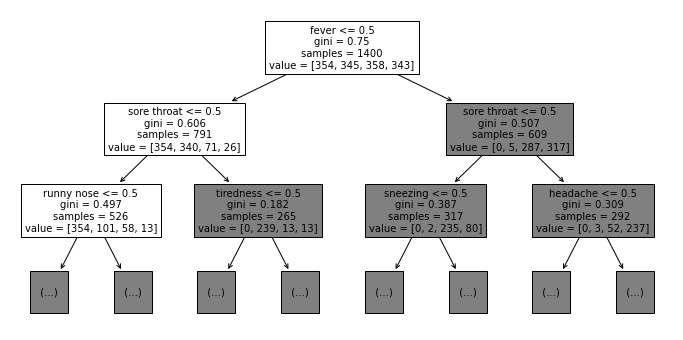

In [8]:

#DRAW DECISION TREE

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
my_tree=diagnose_v4(train_data) # train a model
print(my_tree.classes_) # print the possible target labels (diagnoses)
plt.figure(figsize=(12,6)) # size of the visualization, in inches
# plot the tree
plot_tree(my_tree,
            max_depth=2,
            fontsize=10,
            feature_names=medical_dataset.columns[:-1]
)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_patient_symptoms=test_data.drop(columns=['diagnosis']) 
test_diagnoses=test_data['diagnosis']
pred=my_tree.predict(test_patient_symptoms)
accuracy_score(test_diagnoses,pred)

0.8166666666666667

In [10]:
confusion_matrix(test_diagnoses,pred)

array([[143,   3,   0,   0],
       [ 48,  98,   5,   4],
       [  2,   1, 127,  12],
       [  1,   3,  31, 122]], dtype=int64)